# Online Shopper Purchase Intentions

Over the last decade, we have seen an exponential rise in the number of online shoppers. This number will only continue to rise as the consumer behavior moves more to digital shopping and away from brick-and-mortar shops. In this project, we use a dataset provided by the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) to fit several machine learning algorithms to model online shoppers' purchasing behaviors. Below is a list of techniques used for a quick view:
* PostgreSQL/SQL
* Pandas
* Numpy
* Matplotlib
* SciPy
* Sklearn

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
conn = psycopg2.connect("dbname = online_shoppers user = postgres password = postgres")
cur = conn.cursor()

## Get the full data

In [5]:
sql = 'SELECT * FROM online_shoppers'
cur.execute(sql)
tmp = cur.fetchall()
colnames = [desc[0] for desc in cur.description]

In [6]:
df_full = pd.DataFrame(tmp, columns = colnames)
df_full.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalue,specialday,months,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
administrative             12330 non-null int64
administrative_duration    12330 non-null float64
informational              12330 non-null int64
informational_duration     12330 non-null float64
productrelated             12330 non-null int64
productrelated_duration    12330 non-null float64
bouncerates                12330 non-null float64
exitrates                  12330 non-null float64
pagevalue                  12330 non-null float64
specialday                 12330 non-null float64
months                     12330 non-null object
operatingsystems           12330 non-null int64
browser                    12330 non-null int64
region                     12330 non-null int64
traffictype                12330 non-null int64
visitortype                12330 non-null object
weekend                    12330 non-null bool
revenue                    12330 non-null bool
dtypes: bool(

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Create data frame of rows that ended up in purchases

In [8]:
sql = 'SELECT * FROM online_shoppers WHERE revenue'
cur.execute(sql)
tmp_buy = cur.fetchall()
colnames_buy = [desc[0] for desc in cur.description]

df_buy = pd.DataFrame(tmp_buy, columns = colnames_buy)
df_buy.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalue,specialday,months,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
1,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
2,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
3,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
4,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True


In [9]:
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 18 columns):
administrative             1908 non-null int64
administrative_duration    1908 non-null float64
informational              1908 non-null int64
informational_duration     1908 non-null float64
productrelated             1908 non-null int64
productrelated_duration    1908 non-null float64
bouncerates                1908 non-null float64
exitrates                  1908 non-null float64
pagevalue                  1908 non-null float64
specialday                 1908 non-null float64
months                     1908 non-null object
operatingsystems           1908 non-null int64
browser                    1908 non-null int64
region                     1908 non-null int64
traffictype                1908 non-null int64
visitortype                1908 non-null object
weekend                    1908 non-null bool
revenue                    1908 non-null bool
dtypes: bool(2), float64(7), int6

## Create data frame of rows that did not end up in purchases

In [10]:
sql = 'SELECT * FROM online_shoppers WHERE NOT revenue'
cur.execute(sql)
tmp_no_buy = cur.fetchall()
colnames_no_buy = [desc[0] for desc in cur.description]

df_no_buy = pd.DataFrame(tmp_no_buy, columns = colnames_no_buy)
df_no_buy.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalue,specialday,months,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [11]:
df_no_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 18 columns):
administrative             10422 non-null int64
administrative_duration    10422 non-null float64
informational              10422 non-null int64
informational_duration     10422 non-null float64
productrelated             10422 non-null int64
productrelated_duration    10422 non-null float64
bouncerates                10422 non-null float64
exitrates                  10422 non-null float64
pagevalue                  10422 non-null float64
specialday                 10422 non-null float64
months                     10422 non-null object
operatingsystems           10422 non-null int64
browser                    10422 non-null int64
region                     10422 non-null int64
traffictype                10422 non-null int64
visitortype                10422 non-null object
weekend                    10422 non-null bool
revenue                    10422 non-null bool
dtypes: bool(

We have about five times more data for non-purchases than purchases. This could potentially become an issue when we sample for training and test data.

In [12]:
df_buy.describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalue,specialday,operatingsystems,browser,region,traffictype
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.929779,1.897042,2.407173,3.987140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
df_no_buy.describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalue,specialday,operatingsystems,browser,region,traffictype
count,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000
mean,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392
std,3.202481,171.017970,1.211582,133.909306,40.744717,1803.797757,0.051877,0.051231,9.072424,0.209054,0.907835,1.681790,2.400493,4.032220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,151.000000,0.000000,0.015560,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,16.000000,510.190000,0.004255,0.028571,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,83.000000,0.000000,0.000000,35.000000,1331.816667,0.020000,0.053846,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000


## Initial data exploration

Before I start building predictive models, I want to see if there are any specific variables that show a significant difference between the purchase group and non-purchase groups. However, let's graph some variables first to see how they are distributed.

In [14]:
# Convert into categorical variables as appropriate

df_buy["months"] = df_buy["months"].astype('category')
df_no_buy["months"] = df_no_buy["months"].astype('category')

df_buy["browser"] = df_buy["browser"].astype('category')
df_no_buy["browser"] = df_no_buy["browser"].astype('category')

df_buy["operatingsystems"] = df_buy["operatingsystems"].astype('category')
df_no_buy["operatingsystems"] = df_no_buy["operatingsystems"].astype('category')

df_buy["region"] = df_buy["region"].astype('category')
df_no_buy["region"] = df_no_buy["region"].astype('category')

df_buy["traffictype"] = df_buy["traffictype"].astype('category')
df_no_buy["traffictype"] = df_no_buy["traffictype"].astype('category')

df_buy["visitortype"] = df_buy["visitortype"].astype('category')
df_no_buy["visitortype"] = df_no_buy["visitortype"].astype('category')

df_full["months"] = df_full["months"].astype('category')
df_full["browser"] = df_full["browser"].astype('category')
df_full["operatingsystems"] = df_full["operatingsystems"].astype('category')
df_full["region"] = df_full["region"].astype('category')
df_full["traffictype"] = df_full["traffictype"].astype('category')
df_full["visitortype"] = df_full["visitortype"].astype('category')

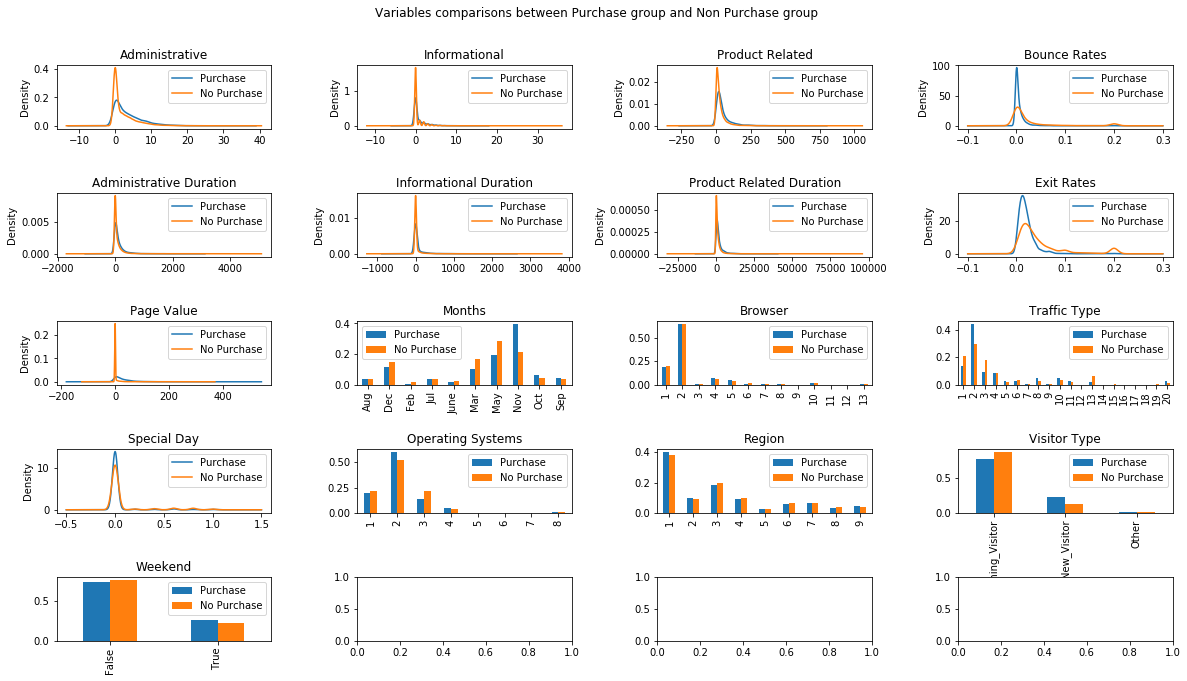

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize  = (20,10))

plt.suptitle("Variables comparisons between Purchase group and Non Purchase group")
plt.subplots_adjust(left = 0.125,  # the left side of the subplots of the figure
                    right = 0.9,   # the right side of the subplots of the figure
                    bottom = 0.1,  # the bottom of the subplots of the figure
                    top = 0.9,     # the top of the subplots of the figure
                    wspace = 0.4,  # the amount of width reserved for space between subplots,
                                   # expressed as a fraction of the average axis width
                    hspace = 1.0  # the amount of height reserved for space between subplots,
                                   # expressed as a fraction of the average axis height
                   )
pd.DataFrame({'Purchase': df_buy["administrative"], 'No Purchase': df_no_buy["administrative"]}).plot.kde(title = "Administrative", ax=axes[0,0])
pd.DataFrame({'Purchase': df_buy["administrative_duration"], 'No Purchase': df_no_buy["administrative_duration"]}).plot.kde(title = "Administrative Duration", ax=axes[1,0])

pd.DataFrame({'Purchase': df_buy["informational"], 'No Purchase': df_no_buy["informational"]}).plot.kde(title = "Informational", ax=axes[0,1])
pd.DataFrame({'Purchase': df_buy["informational_duration"], 'No Purchase': df_no_buy["informational_duration"]}).plot.kde(title = "Informational Duration", ax=axes[1,1])

pd.DataFrame({'Purchase': df_buy["productrelated"], 'No Purchase': df_no_buy["productrelated"]}).plot.kde(title = "Product Related", ax=axes[0,2])
pd.DataFrame({'Purchase': df_buy["productrelated_duration"], 'No Purchase': df_no_buy["productrelated_duration"]}).plot.kde(title = "Product Related Duration", ax=axes[1,2])

pd.DataFrame({'Purchase': df_buy["bouncerates"], 'No Purchase': df_no_buy["bouncerates"]}).plot.kde(title = "Bounce Rates", ax=axes[0,3])
pd.DataFrame({'Purchase': df_buy["exitrates"], 'No Purchase': df_no_buy["exitrates"]}).plot.kde(title = "Exit Rates", ax=axes[1,3])

pd.DataFrame({'Purchase': df_buy["pagevalue"], 'No Purchase': df_no_buy["pagevalue"]}).plot.kde(title = "Page Value", ax=axes[2,0])
pd.DataFrame({'Purchase': df_buy["specialday"], 'No Purchase': df_no_buy["specialday"]}).plot.kde(title = "Special Day", ax=axes[3,0])

pd.DataFrame({'Purchase': df_buy["months"].value_counts(normalize = True), 'No Purchase': df_no_buy["months"].value_counts(normalize = True)}).plot.bar(title = "Months", ax= axes[2,1])
pd.DataFrame({'Purchase': df_buy["operatingsystems"].value_counts(normalize = True), 'No Purchase': df_no_buy["operatingsystems"].value_counts(normalize = True)}).plot.bar(title = "Operating Systems", ax= axes[3,1])

pd.DataFrame({'Purchase': df_buy["browser"].value_counts(normalize = True), 'No Purchase': df_no_buy["browser"].value_counts(normalize = True)}).plot.bar(title = "Browser", ax= axes[2,2])
pd.DataFrame({'Purchase': df_buy["region"].value_counts(normalize = True), 'No Purchase': df_no_buy["region"].value_counts(normalize = True)}).plot.bar(title = "Region", ax= axes[3,2])

pd.DataFrame({'Purchase': df_buy["traffictype"].value_counts(normalize = True), 'No Purchase': df_no_buy["traffictype"].value_counts(normalize = True)}).plot.bar(title = "Traffic Type", ax= axes[2,3])
pd.DataFrame({'Purchase': df_buy["visitortype"].value_counts(normalize = True), 'No Purchase': df_no_buy["visitortype"].value_counts(normalize = True)}).plot.bar(title = "Visitor Type", ax= axes[3,3])

pd.DataFrame({'Purchase': df_buy["weekend"].value_counts(normalize = True), 'No Purchase': df_no_buy["weekend"].value_counts(normalize = True)}).plot.bar(title = "Weekend", ax= axes[4,0])


From the initial graphs, we can see that we see some key differences between purchase group and non purchase groups for variables such as months, exit rates, and bounce rates. (adjust the scale on certain graphs to see the distribution better.) Comment on normality. 

## Prepare train and test sets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from imblearn.over_sampling import SMOTENC

In [18]:
# Split the data into training and test
train, test =  train_test_split(df_full, test_size = 0.3, train_size = 0.7, random_state = 2995)

Fix the imbalance of class labels by SMOTE algorithm

In [19]:
X = train.loc[:, train.columns != 'revenue']
y = train.loc[:, train.columns == 'revenue']

os = SMOTENC(random_state=0, categorical_features=[10,11,12,13,14,15,16])

columns = X.columns

os_data_X, os_data_y = os.fit_sample(X, np.ravel(y))
os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
os_data_y = pd.DataFrame(data=os_data_y, columns=['revenue'])

Assign the appropriate data types and assign dummies to categorical variables.

In [20]:
from sklearn.preprocessing import LabelEncoder
os_data_X['administrative'] = os_data_X['administrative'].astype('int64')
os_data_X['administrative_duration'] = os_data_X['administrative_duration'].astype('float64')
os_data_X['informational'] = os_data_X['informational'].astype('int64')
os_data_X['informational_duration'] = os_data_X['informational_duration'].astype('float64')
os_data_X['productrelated'] = os_data_X['productrelated'].astype('int64')
os_data_X['productrelated_duration'] = os_data_X['productrelated_duration'].astype('float64')
os_data_X['bouncerates'] = os_data_X['bouncerates'].astype('float64')
os_data_X['exitrates'] = os_data_X['exitrates'].astype('float64')
os_data_X['pagevalue'] = os_data_X['pagevalue'].astype('float64')
os_data_X['specialday'] = os_data_X['specialday'].astype('float64')
os_data_X["months"] = os_data_X["months"].astype('category')
os_data_X["browser"] = os_data_X["browser"].astype('category')
os_data_X["operatingsystems"] = os_data_X["operatingsystems"].astype('category')
os_data_X["region"] = os_data_X["region"].astype('category')
os_data_X["traffictype"] = os_data_X["traffictype"].astype('category')
os_data_X["visitortype"] = os_data_X["visitortype"].astype('category')
os_data_X["weekend"] = os_data_X["weekend"].astype('bool')

In [22]:
# Create dummies for categorical variables
os_data_X = pd.get_dummies(os_data_X)

Also split test dataset into data and class label, assign dummies.

In [23]:
test_data = test.iloc[:,0:17]
test_data = pd.get_dummies(test_data)
test_y = test.iloc[:,17]

## Fit Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(os_data_X, os_data_y.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
predictions = lr.predict(test_data)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, predictions)

array([[2792,  350],
       [ 180,  377]], dtype=int64)

In [29]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(test_y, predictions, average= 'binary')

(0.5185694635488308, 0.6768402154398564, 0.5872274143302181, None)

The logistic regression is not performing so well with precision of 0.52 and recall of 0.68. Let's try to get rid of unnecessary features using RFE.

In [30]:
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True  True False  True  True  True
  True  True  True  True  True False False False False False  True  True
  True  True  True False  True  True  True  True False False  True  True
 False False False  True False  True  True False False False  True False
 False False False False  True  True False False  True False  True  True
 False False False  True False  True  True False  True  True  True False
  True False]
[35 36 32 37 34 38  1  1 23  1  1  1  1  1  1  1  1 25  2 19 16 29  1  1
  1  1  1 18  1  1  1  1 10  9  1  1 21 30  8  1 13  1  1 24 33  6  1  4
  5  3 22 26  1  1 15 11  1 12  1  1 27 17 28  1  7  1  1 31  1  1  1 14
  1 20]


In [31]:
os_data_X_lr_RFE = os_data_X.iloc[:,rfe.support_]
test_data_lr_RFE = test_data.iloc[:,rfe.support_]

In [32]:
lr = LogisticRegression()
lr.fit(os_data_X_lr_RFE, os_data_y.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
predictions_lr_RFE = lr.predict(test_data_lr_RFE)
confusion_matrix(test_y, predictions_lr_RFE)

array([[2321,  821],
       [ 289,  268]], dtype=int64)

In [127]:
precision_recall_fscore_support(test_y, predictions_lr_RFE, average= 'binary')

(0.2460973370064279, 0.48114901256732495, 0.32563791008505466, None)

Got worse. Let's see...

## Fit a random forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(os_data_X, os_data_y.values.ravel())

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
rf_predictions = rf.predict(test_data)

In [135]:
confusion_matrix(test_y, rf_predictions)

array([[2912,  230],
       [ 223,  334]], dtype=int64)

In [136]:
precision_recall_fscore_support(test_y, predictions, average= 'binary')

(0.5185694635488308, 0.6768402154398564, 0.5872274143302181, None)

In [138]:
from sklearn.feature_selection import RFE
rf = RandomForestClassifier()
rfe_rf = RFE(rf)
rfe_rf = rfe_rf.fit(os_data_X, os_data_y.values.ravel())
print(rfe_rf.support_)
print(rfe_rf.ranking_)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change 

[ True  True  True  True  True  True  True  True  True  True  True False
  True False False False  True  True  True  True  True  True  True  True
 False False False False False  True  True False  True False False False
 False False False False False False  True  True  True  True False  True
  True False  True  True  True  True  True False False False False False
 False False False  True False False False False False False False  True
 False  True]
[ 1  1  1  1  1  1  1  1  1  1  1  2  1 21  3  9  1  1  1  1  1  1  1  1
  7 33 23 28 20  1  1 22  1 10 17 24 16 36 15 30 26 27  1  1  1  1  5  1
  1  6  1  1  1  1  1 11  8 18  4 25 12 14 37  1 29 32 31 34 35 38 13  1
 19  1]


In [139]:
os_data_X_rf_RFE = os_data_X.iloc[:,rfe_rf.support_]

In [145]:
test_data_rf_RFE = test_data.iloc[:,rfe_rf.support_]

In [146]:
rf.fit(os_data_X_rf_RFE, os_data_y.values.ravel())
rf_rfe_predictions = rf.predict(test_data_rf_RFE)
confusion_matrix(test_y, rf_rfe_predictions)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[2908,  234],
       [ 163,  394]], dtype=int64)

In [147]:
precision_recall_fscore_support(test_y, rf_rfe_predictions, average = 'binary')

(0.6273885350318471, 0.7073608617594255, 0.6649789029535864, None)

Best performance so far! precision of 0.62 and recall of 0.70736. Let's see if we can optimize the random forest to get better performance with these features.

## Fit a Neural Network

In [148]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(os_data_X, os_data_y.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [151]:
clf_predictions = clf.predict(test_data)

In [164]:
confusion_matrix(test_y, clf_predictions)

array([[2243,  899],
       [  93,  464]], dtype=int64)

In [166]:
precision_recall_fscore_support(test_y, clf_predictions, average = "binary")

(0.3404255319148936, 0.8330341113105925, 0.48333333333333334, None)

Worse precision but much better recall.

Precision of 0.34 means that out of all the observations predicted as a generating revenue, only 34% actually did. Whereas recall of 0.83 means that out of all sales, we identified them as sales 83% of the time. For our random forest model, we had a balanced precision and recall of 0.63 and 0.71, respectively. This means that out of all observations predicted as generating revenue, about 63% actually did. In addition, we identified about 71% of all actual sales with the model. Although neural network generates the best recall, we prefer a more balanced model. In our application, correctly predicting sales (precision) is as important as identifying all sales.